<font size="8">THE BATTLE OF NEIGHBORHOODS</font>

<font size="6">Introduction:</font>

<font size="4">Peoject description:</font>

<font size="2">This is for the final project of the Data Science Specialization. A 9-
courses series created by IBM, hosted on Coursera platform. The
problem and the analysis approach are left for the learner to decide, with
a requirement of leveraging the Foursquare location data to explore or
compare neighborhoods or cities of your choice or to come up with a
problem that you can use the Foursquare location data to solve.</font>

<font size="4">Problem description:</font>

<font size="2">The main goal will be exploring the neighborhoods of Chicago city in order to analyze the relationships among population, incomes, race, real estate price, restaurant numbers and ratings.</font>

<font size="2">Our goals can be summarized as follows:
</font>

<font size="2">1.List and visualize all major parts of Chicago city that has great resturants.
</font>

<font size="2">2.Visualize the relationships among population, incomes, race, real estate price, restaurants numbers and ratings.
</font>

<font size="2">3.Which areas show potential? (having the similar features with the best locations)
</font>

In [1]:
#import package
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
!conda config --add channels conda-forge 
!conda install beautifulsoup4 bs4 --yes
from bs4 import BeautifulSoup
!conda install -c conda-forge lxml --yes
import lxml
print('Libraries imported.')
import re
import seaborn as sns
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5


<font size="6">Data Section:</font>


<font size="3">Chicago data set contains neighborhood name, population, income, latinos, blacks, white, asian, other race
.</font>

In [62]:
# read csv data, download from github, then clean it.
df=pd.read_csv('chicago-community-areas.csv').T
df.drop(["Community Area"], inplace = True)
df.drop([3], axis=1, inplace=True)
df.columns=["neighborhood", "population", "income", "latinos", "blacks", "white", "asian", "other"]
df.reset_index(drop=True, inplace=True) 

In [63]:
df.head(2)

,neighborhood,population,income,latinos,blacks,white,asian,other
0,Rogers Park,54991,39482,0.244,0.263,0.393,0.064,0.036
1,West Ridge,71942,47323,0.204,0.111,0.427,0.225,0.032


In [64]:
def add_geo_location(df):
    df["Latitude"] = 0
    df["Longitude"] = 0
    length = df.shape[0]
    for i in range(length):
        address = df.iloc[i,0]+',Chicago, USA'
        geolocator = Nominatim(user_agent="ny_explorer")
        la,lo = calculate_geo_location(address, geolocator )
        df.iloc[i,-2] = la
        df.iloc[i,-1] = lo

In [65]:
def calculate_geo_location(address, geolocator):
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = -10000
        longitude = -10000
    return latitude, longitude

In [66]:
# add Geo-spatial data
add_geo_location(df)
df.drop(df[df["Latitude"]==-10000].index,inplace=True)

In [67]:
df.head(2)

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude
0,Rogers Park,54991,39482,0.244,0.263,0.393,0.064,0.036,42.010531,-87.670748
1,West Ridge,71942,47323,0.204,0.111,0.427,0.225,0.032,42.003548,-87.696243


In [68]:
df.shape

(77, 10)

In [69]:
df.dtypes

neighborhood     object
population       object
income           object
latinos          object
blacks           object
white            object
asian            object
other            object
Latitude        float64
Longitude       float64
dtype: object

In [70]:
df.iloc[:,1:] = df.iloc[:,1:].astype(float)

In [71]:
df.dtypes

neighborhood     object
population      float64
income          float64
latinos         float64
blacks          float64
white           float64
asian           float64
other           float64
Latitude        float64
Longitude       float64
dtype: object

<font size="3">Let's plot the data set first to check the data distribution.</font>

In [184]:
df_sort = df.sort_values(by=['income','population'], ascending=[False,False])

In [185]:
df_sort.reset_index(drop=True, inplace=True)
df_sort.head()

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude
0,Forest Glen,18508.0,87394.0,0.115,0.007,0.746,0.107,0.024,41.991752,-87.751674
1,Beverly,20034.0,83092.0,0.046,0.341,0.588,0.006,0.019,41.718153,-87.671767
2,Lincoln Park,64116.0,82707.0,0.056,0.043,0.829,0.051,0.021,41.940298,-87.638117
3,North Center,31867.0,81524.0,0.136,0.023,0.773,0.045,0.022,41.956107,-87.679160
4,Mount Greenwood,19093.0,80505.0,0.072,0.052,0.860,0.007,0.010,41.698089,-87.708662


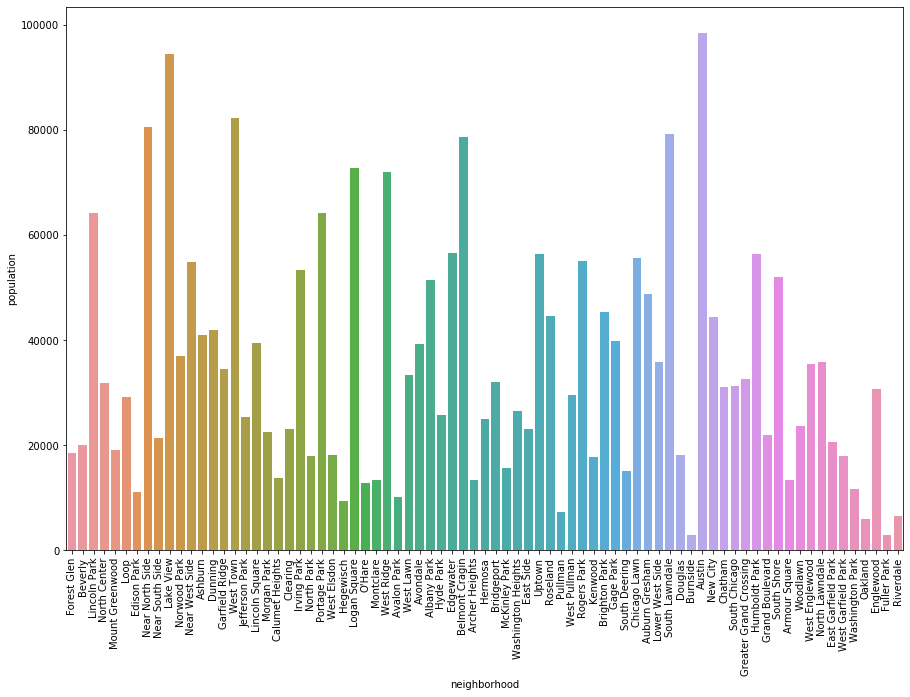

In [186]:


plt.figure(figsize=(15, 10))
g = sns.barplot(x='neighborhood', y='population',  data=df_sort,capsize=.05)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()


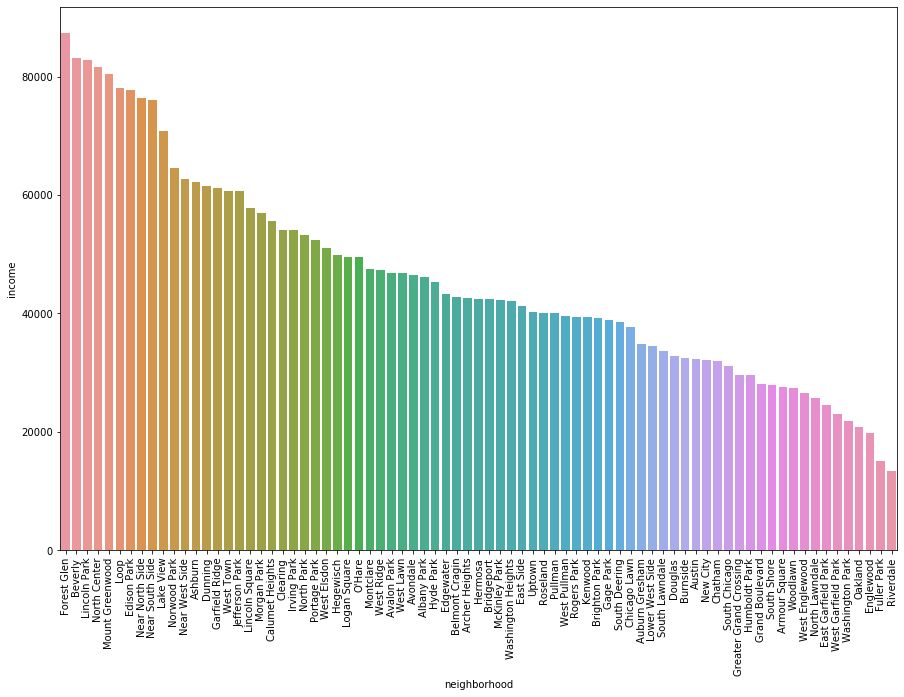

In [187]:
plt.figure(figsize=(15, 10))
g = sns.barplot(x='neighborhood', y='income',  data=df_sort,capsize=.05)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

<font size="3">The above data set shows Chicago city has 77 different neighborhoods. Next we will first visualize the neighborhoods data and then collect restaurants numbers and ratings for each Neighborhood.</font>

In [4]:
address = 'Chicago, USA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago City are {}, {}.'.format(latitude, longitude))
# create map of chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        parse_html=True).add_to(map_chicago)  
    
map_chicago

The geograpical coordinate of Chicago City are 41.8755616, -87.6244212.


In [72]:
CLIENT_ID = 'DBZSGY1Q5IHCU3JFTVYQET0CVDCC3JRJKSJWIPOBWELVRS1V' # your Foursquare ID
CLIENT_SECRET = 'RIOFG2FBIYWDJS0ML4DLS0NFTIAKFJ1AHGLQGHCST2HLHKK5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DBZSGY1Q5IHCU3JFTVYQET0CVDCC3JRJKSJWIPOBWELVRS1V
CLIENT_SECRET:RIOFG2FBIYWDJS0ML4DLS0NFTIAKFJ1AHGLQGHCST2HLHKK5


In [75]:
# prepare neighborhood list that contains indian resturants
column_names=['neighborhood', 'id', 'name']
rest_ch=pd.DataFrame(columns=column_names)

count=1
for row in df.values.tolist():
    neighborhood, _, _, _, _, _, _, _, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    res_venues = venues[venues['Category'].str.contains("Restaurant")]  
    print('(',count,'/',len(df),')','Resturants in '+neighborhood+', '+':'+str(len(res_venues)))
    for resturant_detail in res_venues.values.tolist():
        id, name , category=resturant_detail
        rest_ch = rest_ch.append({'neighborhood': neighborhood, 
                                                'id': id,
                                                'name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 77 ) Resturants in Rogers Park, :22
( 2 / 77 ) Resturants in West Ridge, :17
( 3 / 77 ) Resturants in Uptown, :34
( 4 / 77 ) Resturants in Lincoln Square, :12
( 5 / 77 ) Resturants in North Center, :23
( 6 / 77 ) Resturants in Lake View, :17
( 7 / 77 ) Resturants in Lincoln Park, :16
( 8 / 77 ) Resturants in Near North Side, :20
( 9 / 77 ) Resturants in Edison Park, :9
( 10 / 77 ) Resturants in Norwood Park, :5
( 11 / 77 ) Resturants in Jefferson Park, :9
( 12 / 77 ) Resturants in Forest Glen, :4
( 13 / 77 ) Resturants in North Park, :8
( 14 / 77 ) Resturants in Albany Park, :14
( 15 / 77 ) Resturants in Portage Park, :7
( 16 / 77 ) Resturants in Irving Park, :7
( 17 / 77 ) Resturants in Dunning, :6
( 18 / 77 ) Resturants in Montclare, :7
( 19 / 77 ) Resturants in Belmont Cragin, :14
( 20 / 77 ) Resturants in Hermosa, :8
( 21 / 77 ) Resturants in Avondale, :16
( 22 / 77 ) Resturants in Logan Square, :26
( 23 / 77 ) Resturants in Humboldt Park, :9
( 24 / 77 ) Resturants in West To

In [74]:
def get_venues(lat,lng):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [6]:
# save data
rest_ch.to_csv('rest_ch.csv') 
df.to_csv('df.csv') 

In [77]:
# show samples
rest_ch.head()

,neighborhood,id,name
0,Rogers Park,4b6ed827f964a5200bcd2ce3,El Famous Burrito
1,Rogers Park,4df0fa23d4c04d0392c87e45,Taqueria & Restaurant Cd. Hidalgo
2,Rogers Park,4fcd4dbae4b060c7ef4299bb,Fareast Kitchen
3,Rogers Park,4d7fff51208a548106f26c67,China Spring
4,Rogers Park,4b904e30f964a520f18233e3,Luzzat


In [78]:
rest_ch.shape

(712, 3)

In [3]:
#load csv
df = pd.read_csv('df.csv')
rest_ch = pd.read_csv('rest_ch.csv')
# if reload, drop the first coloumn
#rest_ch.head()
#df.head()
rest_ch.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)

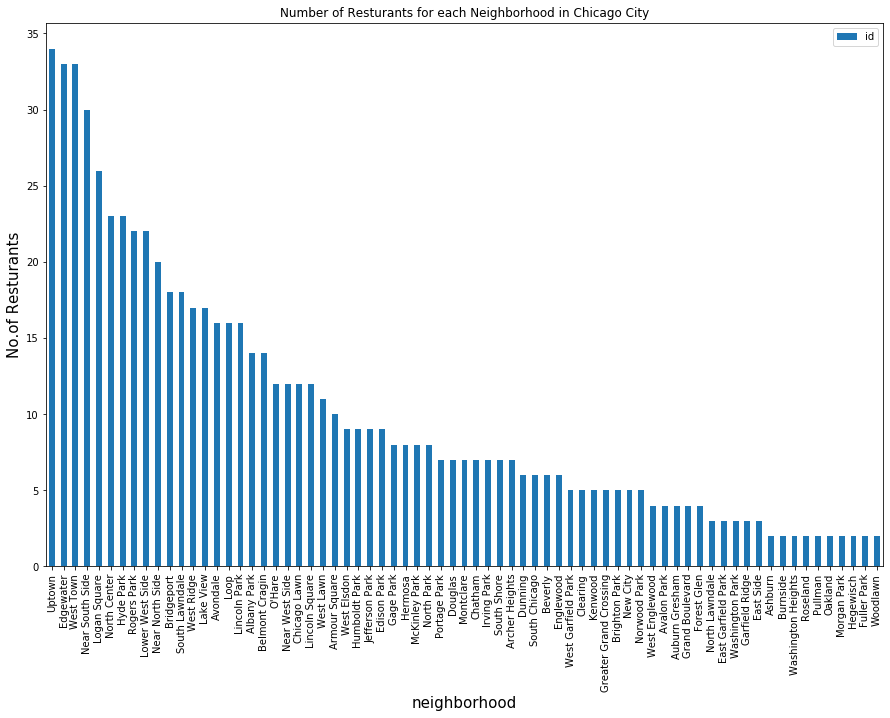

In [79]:
# plot the bar figure of restaurant numbers

plt.figure(figsize=(15, 10))
plt.title('Number of Resturants for each Neighborhood in Chicago City')
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No.of Resturants', fontsize=15)
rest_ch_sort = pd.DataFrame(rest_ch.groupby('neighborhood')['id'].count()).sort_values(by=['id'], ascending= False)
rest_ch_sort['id'].plot(kind='bar')
plt.legend()
plt.show()

In [57]:
#another backup
CLIENT_ID = 'X1NIIUUADZUTK4DONHQTZMV5Q4RH1UMVHOU2LZXMSFHURJFG' # your Foursquare ID
CLIENT_SECRET = 'GRLXVLGJDJXW34PY3MHCOFEMGWBAANMOEA3LCRZEOV0K51YS' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 800
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X1NIIUUADZUTK4DONHQTZMV5Q4RH1UMVHOU2LZXMSFHURJFG
CLIENT_SECRET:GRLXVLGJDJXW34PY3MHCOFEMGWBAANMOEA3LCRZEOV0K51YS


<font size="3">Let's get the house rental data, which reflects the restaurants rent fee(fixed cost) and the food price.
a website page:https://www.rentcafe.com/average-rent-market-trends/us/il/chicago/ exists that has all the information we need to explore and cluster the neighborhoods in Toronto. We will have to crawl the website page, clean it, and then read it into a pandas dataframe.
</font>

In [162]:
# download data
r = requests.get('https://www.rentcafe.com/average-rent-market-trends/us/il/chicago/')
soup = BeautifulSoup(r.text, 'html.parser')
table=soup.find('section', attrs={'class':'rc-chart section-average-rent-by-nhood'})
headers=table.findAll('div',attrs={'class':"label"})
headers=headers[1:len(headers)]
for i, head in enumerate(headers): headers[i] = str(headers[i]).replace("<div class=\"label\">","").replace("</div>","")

rows=table.findAll('div',attrs={'class':"bar"})
rows=rows[1:len(rows)]
for i, row in enumerate(rows): rows[i] = str(rows[i]).replace("<div class=\"bar\">\n<div data-value=","").replace("</span></div>\n</div>","").replace("><span class=\"value\">","")
df_rent=pd.DataFrame(rows).T
df_rent.columns=headers
df_rent = df_rent.iloc[0].str.split("$", n = 2, expand = True)
df_rent.drop(columns=[0],inplace=True)
df_rent.reset_index(drop=False, inplace=True)
df_rent.columns=['neighborhood','price']

In [163]:
# let's check the details and shape
df_rent.head()

,neighborhood,price
0,Streeterville,"2,566"
1,River West,"2,557"
2,Near East Side Chicago,"2,543"
3,Chicago Loop,"2,534"
4,East Village,"2,483"


In [164]:
df_rent.shape

(173, 2)

In [165]:
df.shape

(77, 10)

In [166]:
df_merge = pd.merge(df, df_rent, how='left', on='neighborhood')

In [167]:
df_merge.head()

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price
0,Rogers Park,54991.0,39482.0,0.244,0.263,0.393,0.064,0.036,42.010531,-87.670748,"1,199"
1,West Ridge,71942.0,47323.0,0.204,0.111,0.427,0.225,0.032,42.003548,-87.696243,NaN
2,Uptown,56362.0,40324.0,0.142,0.200,0.516,0.114,0.028,41.966630,-87.655546,NaN
3,Lincoln Square,39493.0,57749.0,0.191,0.038,0.631,0.111,0.029,41.975990,-87.689616,"1,180"
4,North Center,31867.0,81524.0,0.136,0.023,0.773,0.045,0.022,41.956107,-87.679160,"1,504"


In [168]:
df_merge.shape

(77, 11)

In [169]:
# clean data and fill Nan data with mean values
df_merge.dtypes

neighborhood     object
population      float64
income          float64
latinos         float64
blacks          float64
white           float64
asian           float64
other           float64
Latitude        float64
Longitude       float64
price            object
dtype: object

In [170]:
def convert_currency(var):
    var = str(var)
    new_value = var.replace(",","")
    return float(new_value)

In [171]:
df_merge["price"]=df_merge["price"].apply(convert_currency)
df_merge.fillna(df_merge["price"].mean(), inplace= True)

In [175]:
df_merge.head()

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price
0,Rogers Park,54991.0,39482.0,0.244,0.263,0.393,0.064,0.036,42.010531,-87.670748,1199.000000
1,West Ridge,71942.0,47323.0,0.204,0.111,0.427,0.225,0.032,42.003548,-87.696243,1288.520833
2,Uptown,56362.0,40324.0,0.142,0.200,0.516,0.114,0.028,41.966630,-87.655546,1288.520833
3,Lincoln Square,39493.0,57749.0,0.191,0.038,0.631,0.111,0.029,41.975990,-87.689616,1180.000000
4,North Center,31867.0,81524.0,0.136,0.023,0.773,0.045,0.022,41.956107,-87.679160,1504.000000


In [176]:
# save csv
df_merge.to_csv('df_merge.csv')

In [ ]:
#load csv
df_merge = pd.read_csv('df_merge.csv')
df_merge.drop(columns=['Unnamed: 0'],inplace=True)

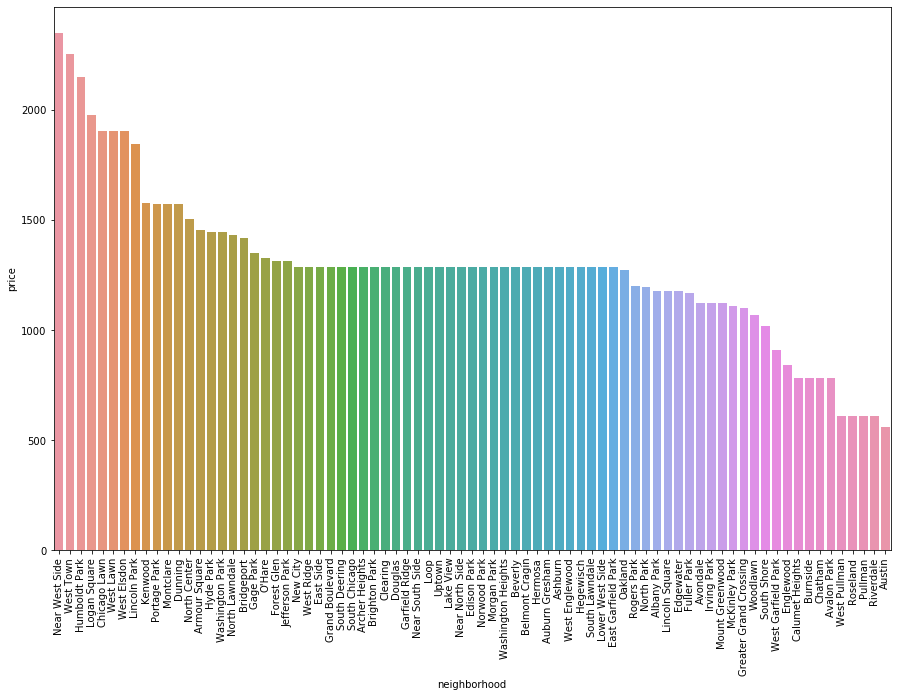

In [201]:
# let's plot the price figure to check the data distribution
plt.figure(figsize=(15, 10))
g = sns.barplot(x='neighborhood', y='price',  data=df_merge.sort_values(by=['price'], ascending= False), capsize=.05)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

<font size="3"> Let's combine restaurant data with other data and clean them
</font>

In [206]:
rest_count = pd.DataFrame(rest_ch.groupby('neighborhood')['id'].count())
rest_count.reset_index(drop=False, inplace=True)
rest_count.columns=['neighborhood', 'restaurants']

In [207]:
rest_count.head()

,neighborhood,restaurants
0,Albany Park,14
1,Archer Heights,7
2,Armour Square,10
3,Ashburn,2
4,Auburn Gresham,4


In [208]:
df_merge_all = pd.merge(df_merge, rest_count, how='left', on='neighborhood')
df_merge_all = df_merge_all.fillna(0)

In [34]:
df_merge_all.head()

In [35]:
# save csv
df_merge_all.to_csv('df_merge_all.csv')

In [13]:
# load csv
df_merge_all = pd.read_csv('df_merge_all.csv')
df_merge_all.drop(columns=['Unnamed: 0'],inplace=True)

<font size="6">Data Analysis:</font>

<font size="3">What's the top ten neighborhoods with the highest numbers of restaurants?
.</font>

In [7]:
df_merge_all.sort_values(by=['restaurants'], ascending= False).head(10)['neighborhood']

2              Uptown
76          Edgewater
23          West Town
32    Near South Side
21       Logan Square
40          Hyde Park
4        North Center
30    Lower West Side
0         Rogers Park
7     Near North Side
Name: neighborhood, dtype: object

<font size="3">Let us plot scatter figures to show the relationships between the number of restaurants and
other features
.</font>

<font size="2"> 1) price VS number of restaurants
.</font>

In [3]:
import seaborn as sns

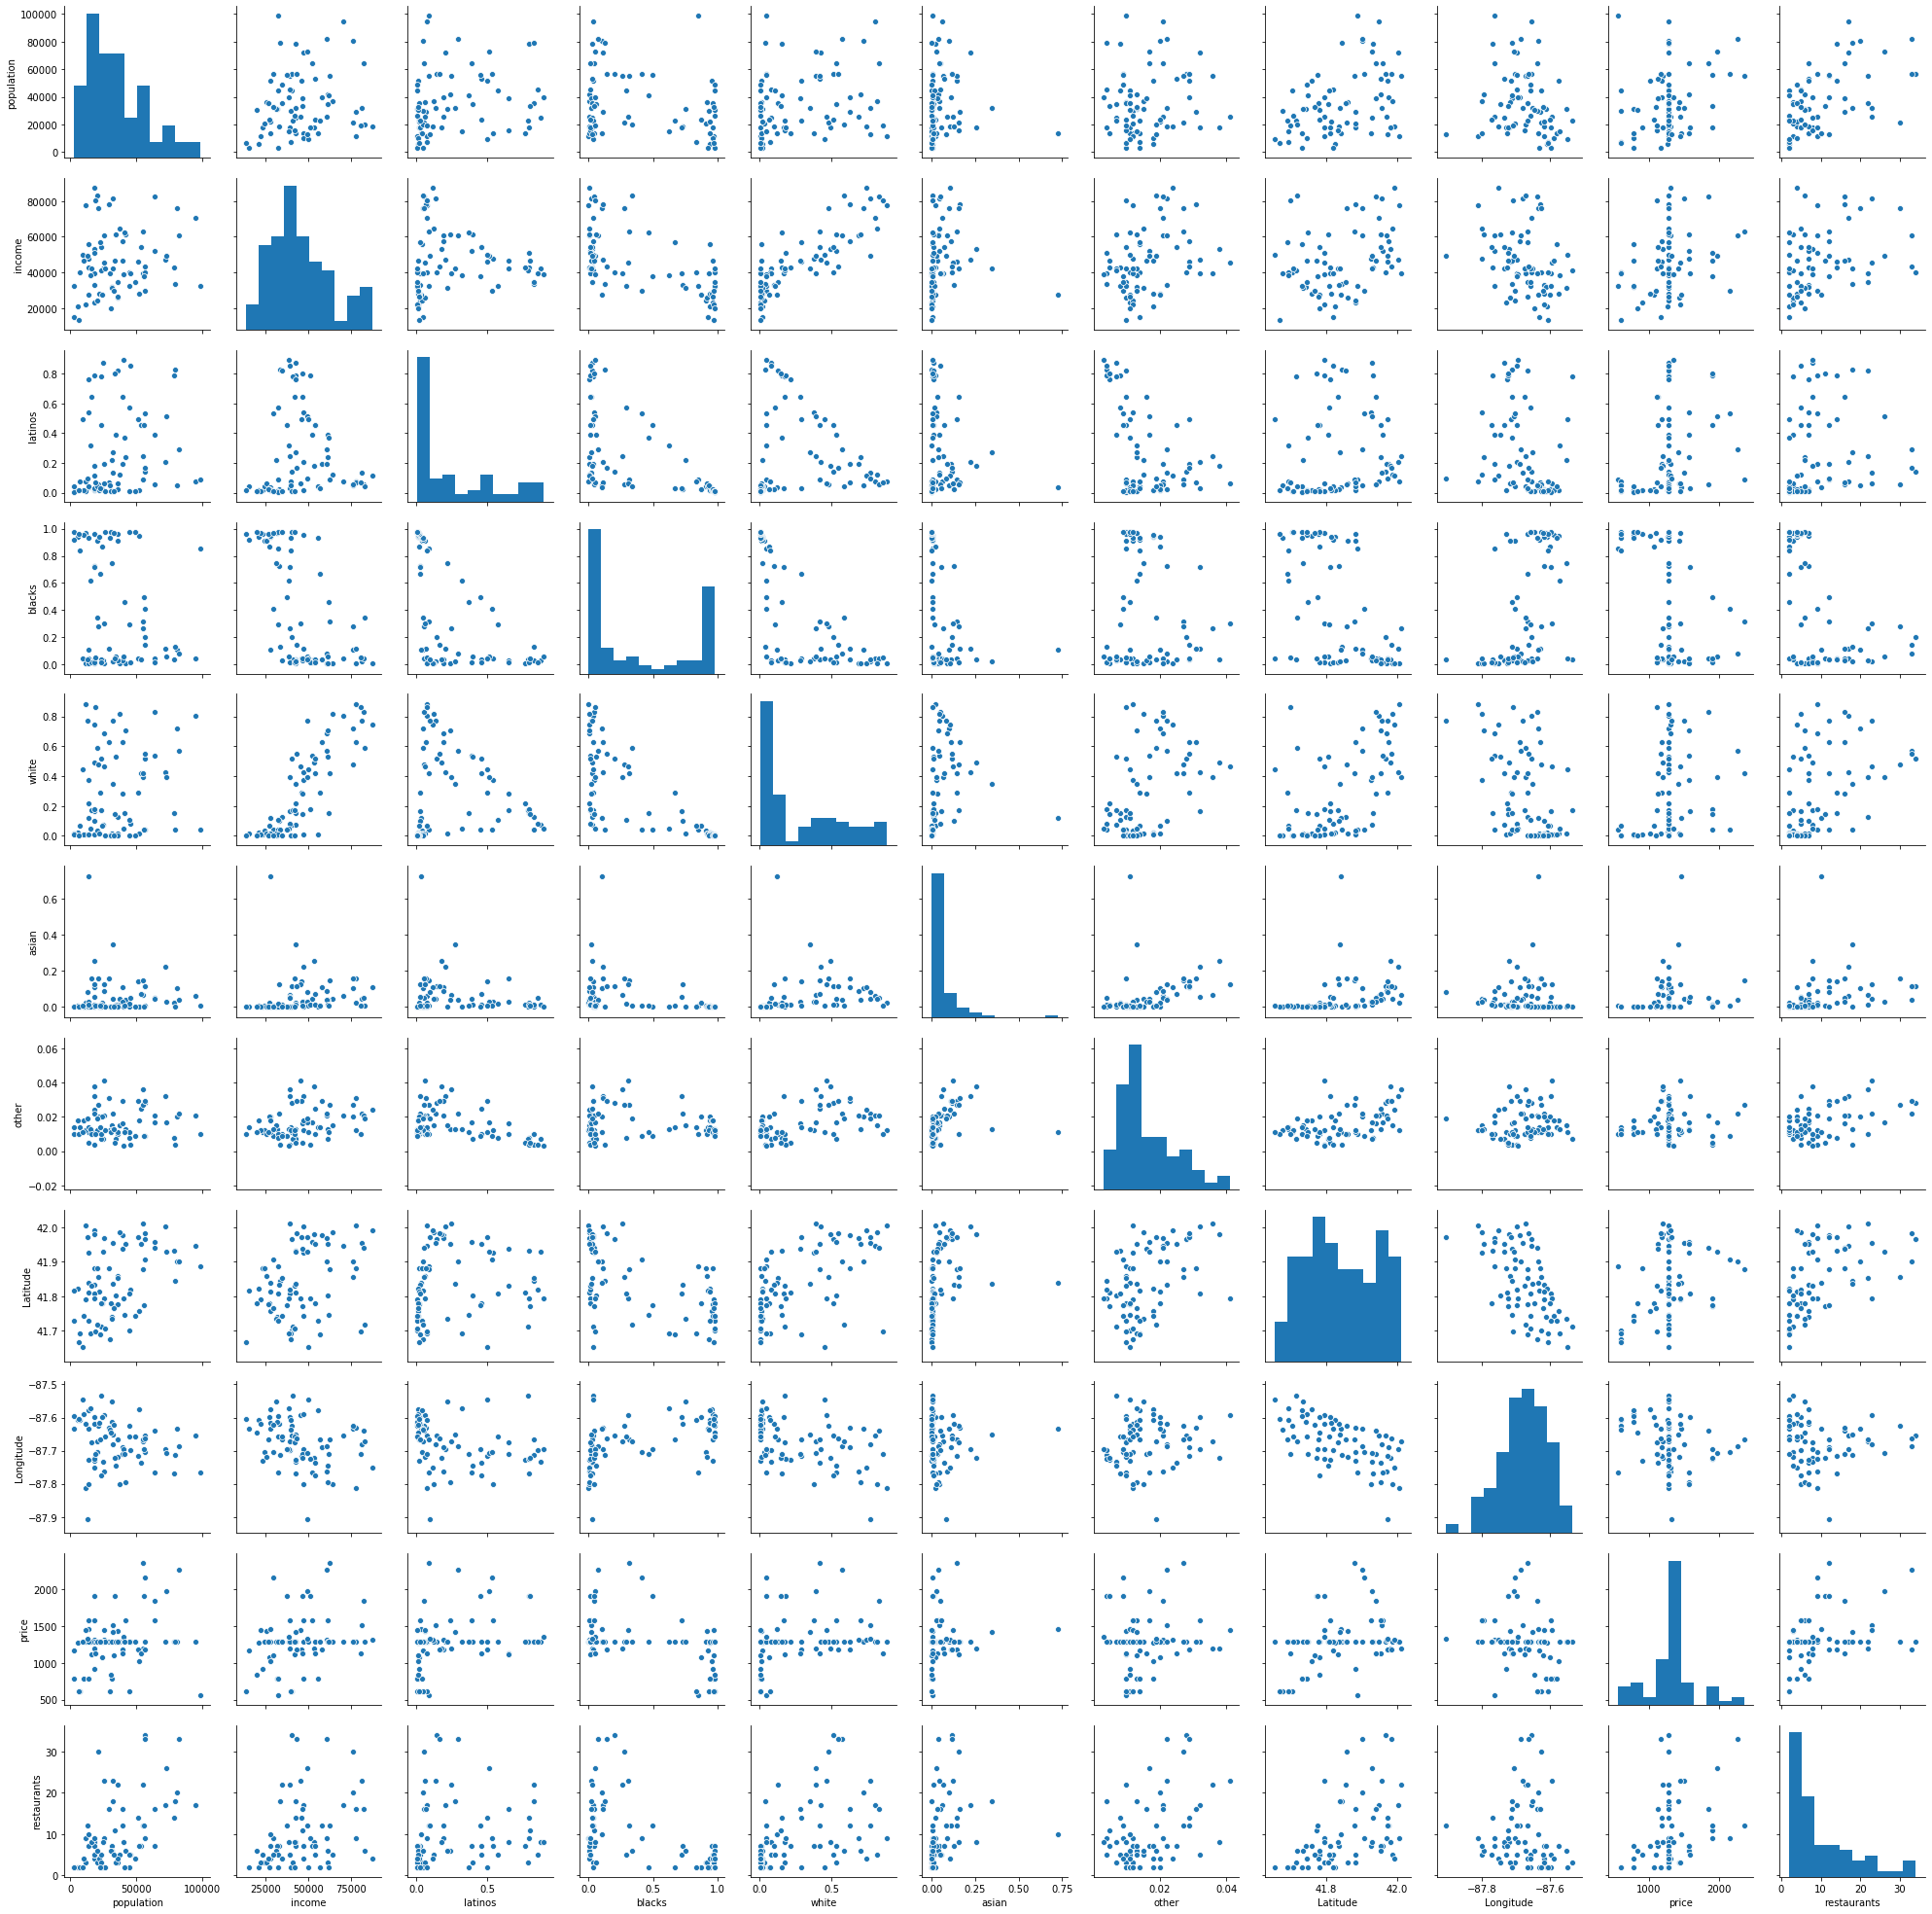

In [10]:

sns_plot = sns.pairplot(df_merge_all, kind="scatter")
sns_plot.savefig('relationship_scatter_hist.png')


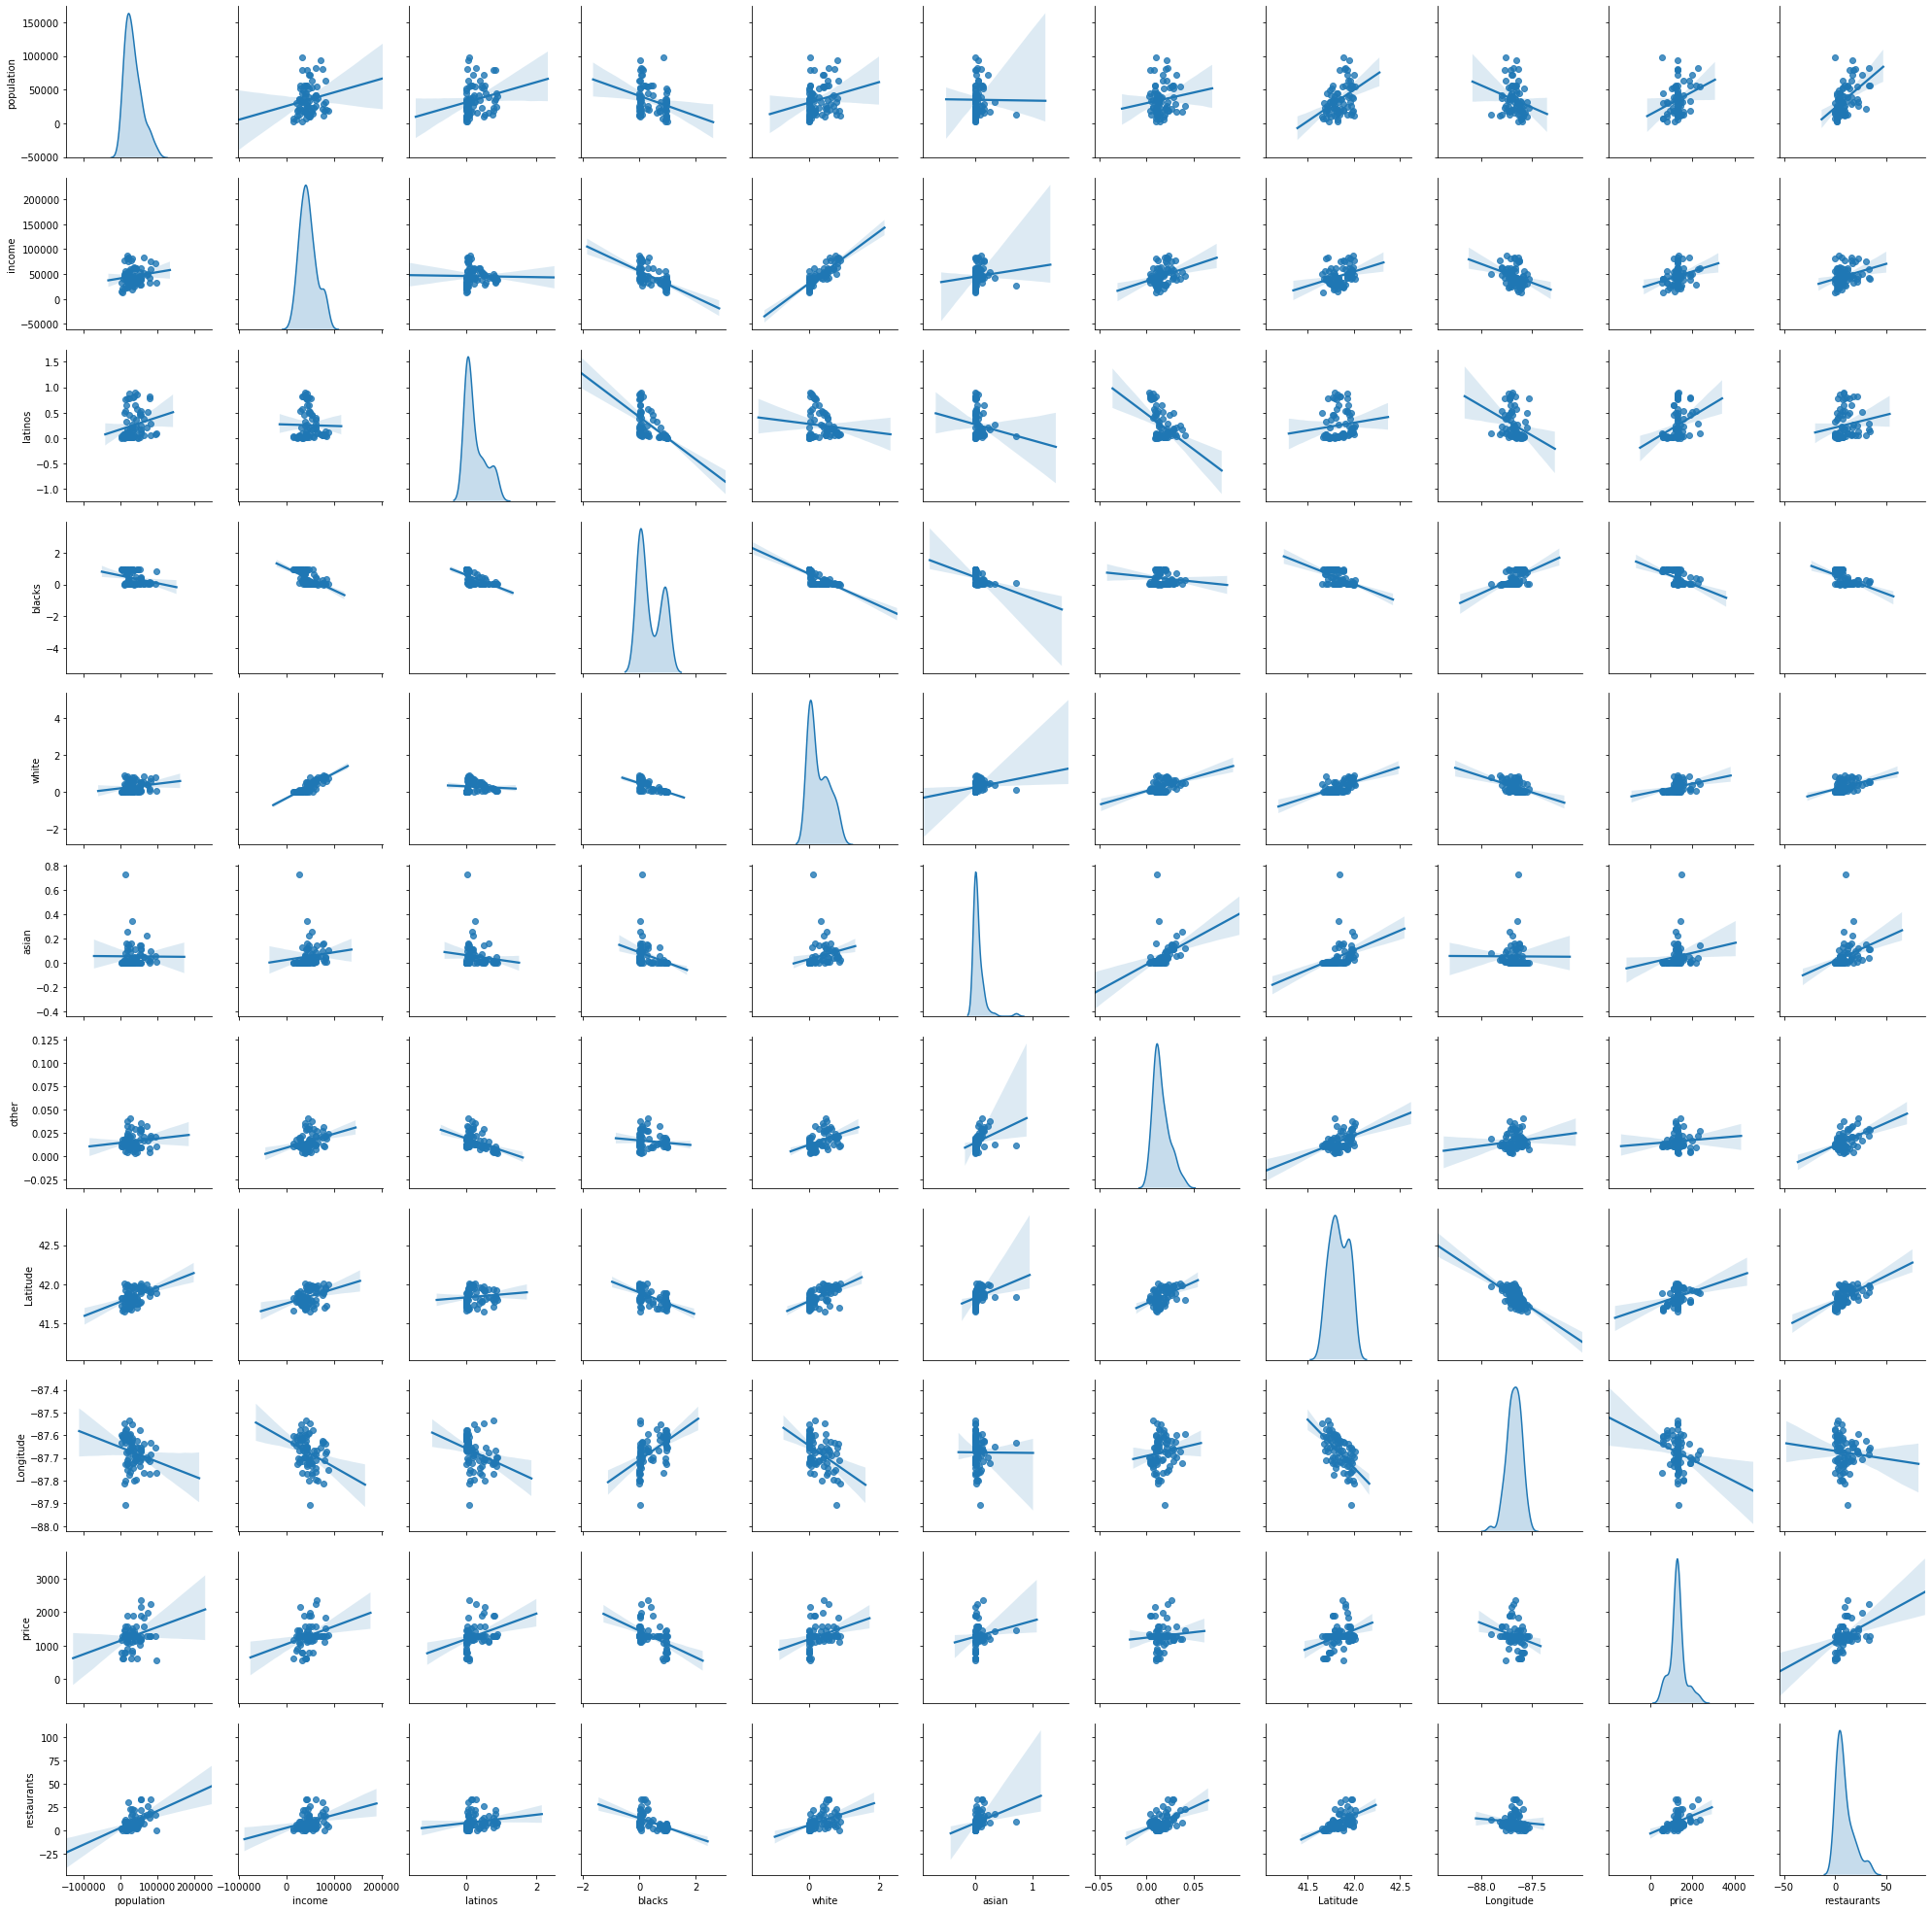

In [37]:

sns_plot2 = sns.pairplot(df_merge_all,kind="reg",diag_kind="kde")
sns_plot2.savefig('relationship_reg_kde.png')

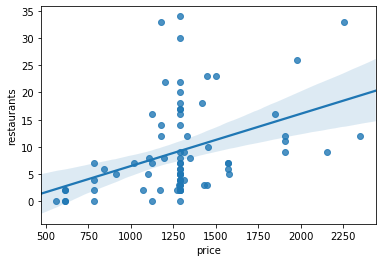

In [42]:
sns.regplot(x="price", y="restaurants", data=df_merge_all)

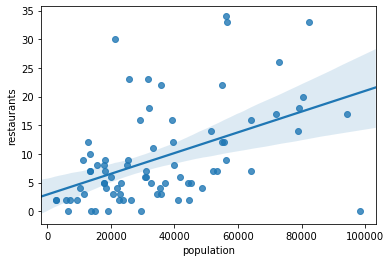

In [39]:
sns.regplot(x="population", y="restaurants", data=df_merge_all)

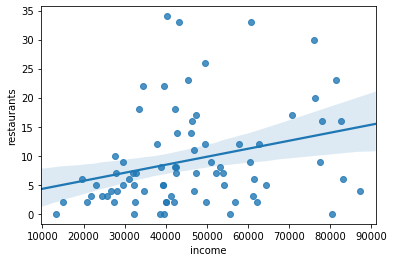

In [41]:
sns.regplot(x="income", y="restaurants", data=df_merge_all)

In [43]:
df_merge_all.describe(include='all')

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price,restaurants
count,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rogers Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,35007.766234,45823.064935,0.255403,0.391805,0.282688,0.054104,0.015948,41.840406,-87.675310,1288.520833,9.246753
std,NaN,22400.350739,17571.879139,0.281042,0.402650,0.281802,0.102284,0.008530,0.099928,0.069661,349.628411,8.384126
min,NaN,2876.000000,13380.000000,0.007000,0.003000,0.003000,0.000000,0.003000,41.653646,-87.906768,562.000000,0.000000
25%,NaN,18109.000000,32553.000000,0.035000,0.033000,0.021000,0.002000,0.010000,41.766886,-87.718388,1178.000000,3.000000
50%,NaN,31028.000000,42418.000000,0.115000,0.143000,0.165000,0.010000,0.013000,41.831700,-87.666762,1288.520833,7.000000
75%,NaN,48743.000000,55669.000000,0.453000,0.909000,0.515000,0.064000,0.021000,41.931698,-87.624774,1330.000000,12.000000


<font size="2">Based on the above figures, conclusions can be summarized as follows:
</font>

<font size="2">1. Neighborhoods with more population demands more restaurants
.</font>

<font size="2">2. It is counterintuitive that not neighborhoods with higher incomes have more restaurants; Actually, neighborhoods whose incomes are among 37500 and 75000.
</font>

<font size="2">3. Among all races, the neighborhoods where more white people dwell the more restaurants will be there; the number of restaurants increases sharply with the increase of asian population.
</font>

<font size="2">4. The neighborhoods in the eastern Chicago have more restaurants.
</font>

<font size="2">5. The rent fees for most restaurants are among 1000  dollars and 1500 dollars. 
</font>

<font size="2">6. Most restaurants have less than 10 restaurants(because the query restriction of free version of foursquare api, we set the radius as 800). 
</font>

<font size="3">Use Pearson Correlation and P value to check the relationships among features and the number of restaurants
</font>

In [45]:
df_merge_all.corr()


,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price,restaurants
population,1.000000,0.158677,0.188791,-0.268153,0.193299,-0.005859,0.120195,0.414476,-0.205366,0.261643,0.483141
income,0.158677,1.000000,-0.017895,-0.608502,0.839576,0.106144,0.306844,0.326617,-0.300464,0.265904,0.288821
latinos,0.188791,-0.017895,1.000000,-0.598503,-0.088472,-0.113886,-0.422515,0.107208,-0.289621,0.308689,0.148088
blacks,-0.268153,-0.608502,-0.598503,1.000000,-0.704699,-0.339418,-0.128790,-0.568606,0.506661,-0.460743,-0.494046
white,0.193299,0.839576,-0.088472,-0.704699,1.000000,0.225200,0.447044,0.577106,-0.437646,0.297632,0.430785
asian,-0.005859,0.106144,-0.113886,-0.339418,0.225200,1.000000,0.352828,0.314864,-0.003653,0.138924,0.311180
other,0.120195,0.306844,-0.422515,-0.128790,0.447044,0.352828,1.000000,0.465925,0.120102,0.079069,0.477621
Latitude,0.414476,0.326617,0.107208,-0.568606,0.577106,0.314864,0.465925,1.000000,-0.606663,0.318327,0.549015
Longitude,-0.205366,-0.300464,-0.289621,0.506661,-0.437646,-0.003653,0.120102,-0.606663,1.000000,-0.236302,-0.083881
price,0.261643,0.265904,0.308689,-0.460743,0.297632,0.138924,0.079069,0.318327,-0.236302,1.000000,0.400682


In [47]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_merge_all['population'], df_merge_all['restaurants'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.48314085413317565  with a P-value of P = 8.565985422491125e-06


In [48]:
pearson_coef, p_value = stats.pearsonr(df_merge_all['price'], df_merge_all['restaurants'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.40068247552309183  with a P-value of P = 0.00030500957612873453


<font size="3">The above data proves the accuracy and correlationships
</font>

<font size="3">Use K-means method to cluster neighborhoods
</font>

In [50]:
# first let us do standarization
df_merge_all.head()

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price,restaurants
0,Rogers Park,54991.0,39482.0,0.244,0.263,0.393,0.064,0.036,42.010531,-87.670748,1199.000000,22.0
1,West Ridge,71942.0,47323.0,0.204,0.111,0.427,0.225,0.032,42.003548,-87.696243,1288.520833,17.0
2,Uptown,56362.0,40324.0,0.142,0.200,0.516,0.114,0.028,41.966630,-87.655546,1288.520833,34.0
3,Lincoln Square,39493.0,57749.0,0.191,0.038,0.631,0.111,0.029,41.975990,-87.689616,1180.000000,12.0
4,North Center,31867.0,81524.0,0.136,0.023,0.773,0.045,0.022,41.956107,-87.679160,1504.000000,23.0


In [51]:
df_merge_all.shape

(77, 12)

In [52]:
from sklearn import preprocessing
df_merge_stand = df_merge_all.copy()
for i in range(df_merge_all.shape[1]-1):
    df_merge_stand.iloc[:,i+1] = preprocessing.scale(df_merge_stand.iloc[:,i+1])


In [53]:
df_merge_stand.head()

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price,restaurants
0,Rogers Park,0.897945,-0.363231,-0.040839,-0.321992,0.394017,0.097386,2.366179,1.713637,0.065916,-0.257725,1.531093
1,West Ridge,1.659636,0.085920,-0.184100,-0.701967,0.515461,1.681760,1.894169,1.643297,-0.302462,0.000000,0.930817
2,Uptown,0.959550,-0.314999,-0.406154,-0.479481,0.833356,0.589428,1.422159,1.271426,0.285581,0.000000,2.971754
3,Lincoln Square,0.201544,0.683145,-0.230659,-0.884455,1.244119,0.559905,1.540162,1.365707,-0.206716,-0.312424,0.330541
4,North Center,-0.141130,2.045031,-0.427643,-0.921952,1.751323,-0.089590,0.714145,1.165434,-0.055623,0.620351,1.651148


In [56]:
#save 
df_merge_stand.to_csv('df_merge_stand.csv')

In [7]:
#load
# load csv
df_merge_stand = pd.read_csv('df_merge_stand.csv')
df_merge_stand.drop(columns=['Unnamed: 0'],inplace=True)

<font size="2">Let's first try k-means. We plot the elbow figure to find the best k.
</font>

([<matplotlib.axis.XTick at 0x7fa5a5028240>,
 <a list of 18 Text xticklabel objects>)

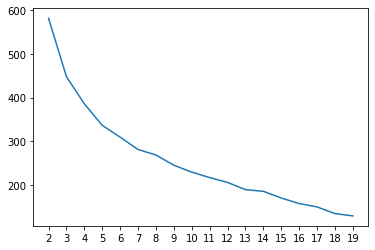

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
errors=np.zeros(18) # use this array to save distortions errors
df_merge_clustering = df_merge_stand.drop('neighborhood', 1)
shape_l, shape_w = df_merge_clustering.shape
for i in range(2,20):
        kmeans=KMeans(n_clusters=i,random_state=0).fit(df_merge_clustering)
        m=kmeans.labels_
        c=kmeans.cluster_centers_
        for j in range(shape_l):
            c1 = c[m[j]]
            x = df_merge_clustering.values[j]
            errors[i-2]=errors[i-2]+sum((x-c1)**2)
plt.plot(np.arange(2,20),errors )
plt.xticks(np.arange(2,20))

<font size="2">Based on the figure, k=7 is the inflexion point
</font>

In [11]:
from sklearn.cluster import KMeans
kclusters = 7
df_merge_clustering = df_merge_stand.drop('neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_merge_clustering)


In [14]:

df_merge_all_tempt = df_merge_all.copy()
df_merge_all_tempt['cluster']= pd.DataFrame(kmeans.labels_)[0]
df_merge_all_tempt.head() 

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price,restaurants,cluster
0,Rogers Park,54991.0,39482.0,0.244,0.263,0.393,0.064,0.036,42.010531,-87.670748,1199.000000,22.0,6
1,West Ridge,71942.0,47323.0,0.204,0.111,0.427,0.225,0.032,42.003548,-87.696243,1288.520833,17.0,6
2,Uptown,56362.0,40324.0,0.142,0.200,0.516,0.114,0.028,41.966630,-87.655546,1288.520833,34.0,6
3,Lincoln Square,39493.0,57749.0,0.191,0.038,0.631,0.111,0.029,41.975990,-87.689616,1180.000000,12.0,6
4,North Center,31867.0,81524.0,0.136,0.023,0.773,0.045,0.022,41.956107,-87.679160,1504.000000,23.0,1


In [67]:
#save
df_merge_all_tempt.to_csv("df_merge_all_tempt.csv")

In [5]:
#load
# load csv
df_merge_all_tempt = pd.read_csv('df_merge_all_tempt.csv')
df_merge_all_tempt.drop(columns=['Unnamed: 0'],inplace=True)

<font size="2">Visualize all cluster data
</font>

In [15]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merge_all_tempt['Latitude'], df_merge_all_tempt['Longitude'], df_merge_all_tempt['neighborhood'], df_merge_all_tempt['cluster']):
    #cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<font size="2">2.which neighborhood has the potential to open new restaurant?
</font>

In [71]:
df_merge_all_tempt.sort_values(by=['cluster'], ascending=False)

,neighborhood,population,income,latinos,blacks,white,asian,other,Latitude,Longitude,price,restaurants,cluster
0,Rogers Park,54991.0,39482.0,0.244,0.263,0.393,0.064,0.036,42.010531,-87.670748,1199.000000,22.0,6
12,North Park,17931.0,53305.0,0.180,0.032,0.493,0.257,0.038,41.980587,-87.720892,1198.000000,8.0,6
40,Hyde Park,25681.0,45335.0,0.063,0.304,0.467,0.124,0.041,41.794446,-87.593924,1447.000000,23.0,6
1,West Ridge,71942.0,47323.0,0.204,0.111,0.427,0.225,0.032,42.003548,-87.696243,1288.520833,17.0,6
32,Near South Side,21390.0,75995.0,0.056,0.281,0.481,0.155,0.027,41.856700,-87.624774,1288.520833,30.0,6
31,Loop,29283.0,78124.0,0.069,0.115,0.627,0.159,0.031,41.881609,-87.629457,1288.520833,16.0,6
15,Irving Park,53359.0,54048.0,0.456,0.033,0.417,0.070,0.025,41.953365,-87.736447,1124.000000,7.0,6
13,Albany Park,51542.0,46198.0,0.494,0.040,0.292,0.144,0.029,41.971937,-87.716174,1180.000000,14.0,6
76,Edgewater,56521.0,43331.0,0.165,0.143,0.547,0.116,0.029,41.983369,-87.663952,1178.000000,33.0,6
2,Uptown,56362.0,40324.0,0.142,0.200,0.516,0.114,0.028,41.966630,-87.655546,1288.520833,34.0,6


<font size="3">Based on our cluster results, cluster 6 is ideal place for new restaurants. Especially, Rogers Park and Hyde Park belong to the 6th cluster and have less than 30 restaurants now.  
</font>

<font size="3"> According to the above data, we find that cluster 1 is competitive and has high amounts of restaurants. Then we want to know is our cluster accurate? Or should we combine cluster 1 and 6 together? We can use ANOVA method to check the difference between the cluster 1 and cluster 6.
</font>

<font size="2"> ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:
F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
P-value: P-value tells how statistically significant is our calculated score value.
If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
</font>


In [23]:
df_grouped = df_merge_all_tempt.drop('neighborhood',1)
df_grouped = df_grouped.groupby(['cluster'])


In [25]:
# ANOVA
from scipy import stats
f_val, p_val = stats.f_oneway(df_grouped.get_group(1)['restaurants'], df_grouped.get_group(6)['restaurants'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.1051366776809853 , P = 0.7499507171065818


<font size="2"> F-statistics = MSB / MSE where MSB is mean squared between and MSE is mean squared error. MSB measures the variance of each cluster to the whole population. MSE measures the variance of each cluster itself. If F is large(MSB is large, MSE is small), at least there exists one cluster is difference from the others. And all clusters' variances are small. If F is small(MSB is small and MSE is large), there are two possible cases, one of which is the mean values of clusters are similar. Another case is the variances of all cluster are large. In our case, F= 0.1, which is small, thus we can not reject our null hypothesis(clster 1 and 6 are the same).
</font>

<font size="3"> Thus, cluster 6 and 1 are ideal place for new restaurants. Rogers Park, Hyde Park and Logan Square are competitive.


</font>